##Taller Nº1 Análisis Datos Python
Arturo Vargas
Javier Cruzat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fd_001 = pd.read_csv("/content/drive/MyDrive/CMAPSS/CMAPSS/train_FD001.txt",sep=" ",header=None)

In [ ]:
fd_002 = pd.read_csv("/content/drive/MyDrive/CMAPSS/CMAPSS/train_FD002.txt",sep=" ",header=None)

In [ ]:
fd_003 = pd.read_csv("/content/drive/MyDrive/CMAPSS/CMAPSS/train_FD003.txt",sep=" ",header=None)

In [ ]:
fd_004 = pd.read_csv("/content/drive/MyDrive/CMAPSS/CMAPSS/train_FD004.txt",sep=" ",header=None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Experimento 1

El documento explica un método para simular cómo se acumula el daño en los motores de los aviones.  Utiliza un modelo de computadora del motor para predecir cómo cambian las lecturas de los sensores a medida que el motor se desgasta.  Este desgaste se simula como una disminución en el "flujo" y la "eficiencia" del motor a lo largo del tiempo.

 La simulación continúa hasta que el motor alcanza un punto de "falla" predefinido.  Los datos generados por esta simulación se utilizaron en una competencia para probar qué tan bien los programas de computadora pueden predecir cuándo fallarán los motores.

Experimento 2

El modelo de Coffin-Manson predice la falla de componentes por fatiga en motores de avión.  Considera cómo los cambios de temperatura y la frecuencia de esos cambios afectan la formación de grietas y, finalmente, la falla del componente.

El modelo de Coffin-Manson predice la falla por fatiga considerando:

Ciclos hasta la falla: Cuántos ciclos de tensión soporta el componente.

Frecuencia de ciclado: Rapidez de los ciclos de tensión.

Rango de temperatura: Variación de temperatura en cada ciclo.

Estas variables estiman la resistencia del material a la fatiga.

##Experimento 3
La experiencia FD003 del modelo C-MAPSS simula el funcionamiento de 100 motores turbofan que operan bajo una única condición operativa constante, pero a diferencia de FD001, incorpora múltiples modos de falla al mismo tiempo. Esto significa que distintos componentes del motor (como compresores y turbinas) pueden degradarse simultáneamente.

El desgaste se modela con funciones exponenciales, y se añade ruido realista (de proceso, medición y ensamblaje) para imitar condiciones reales. Cada registro incluye el ciclo de vuelo, el ID del motor, condiciones de operación (fijas) y 21 sensores.

Este conjunto es útil para estudiar cómo interactúan distintas fallas en un entorno estable, ideal para probar modelos de pronóstico que analicen trayectorias de deterioro más complejas sin la interferencia de cambios externos.

El Experimento FD004

 simula el daño en motores de turbofan para desarrollar métodos de mantenimiento predictivo.  Se simulan 249 motores con condiciones operativas variables (altitud, número Mach, ángulo del acelerador) para crear un escenario realista.  El daño se modela como una pérdida de eficiencia y flujo, con factores añadidos para imitar datos reales (ruido, variaciones de ensamblaje, etc.).  El dataset resultante incluye lecturas de sensores y condiciones operativas por cada ciclo de vuelo, sin proporcionar directamente la vida útil restante (RUL), la cual debe ser estimada.

Las variables

El dataset FD004 simula motores con:

ID de motor: Identifica cada motor.

Número de ciclo: Indica el uso del motor.

Condiciones operativas: (altitud, ángulo del acelerador) Varían durante la simulación.

Variables de sensor: 21 lecturas simuladas del motor.

**Analisis Experimento 1**

In [ ]:
fd_001

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
fd_001.drop(columns=[26,27],inplace=True)

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [ ]:
fd_001.columns = columns

In [ ]:
fd_001

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
def prepare_train_data(data, factor = 0):
    # Hacer una copia del DataFrame original para evitar cambios en el DataFrame original
    df = data.copy()

    # Agrupar por 'unit_number' y encontrar el máximo 'time_in_cycles' para cada grupo
    # reset_index() se usa para convertir 'unit_number' de un índice a una columna
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()

    # Cambiar el nombre de la columna 'time_in_cycles' a 'max'
    fd_RUL.rename(columns = {'time_in_cycles':'max'}, inplace = True)

    # Combinar el DataFrame original con fd_RUL basado en 'unit_number'
    # Esto agrega la columna 'max' al DataFrame original
    df = df.merge(fd_RUL, on=['unit_number'], how='left')

    # Calcular la columna 'RUL' como la diferencia entre 'max' y 'time_in_cycles'
    df['RUL'] = df['max'] - df['time_in_cycles']

    # Eliminar la columna 'max' ya que ya no es necesaria
    df.drop(columns=['max'],inplace = True)

    # Devolver solo las filas donde 'time_in_cycles' es mayor que el factor dado
    return df[df['time_in_cycles'] > factor]

In [ ]:
df = prepare_train_data(fd_001)

In [ ]:
df

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


Text(0, 0.5, 'Cantidad de puntos')

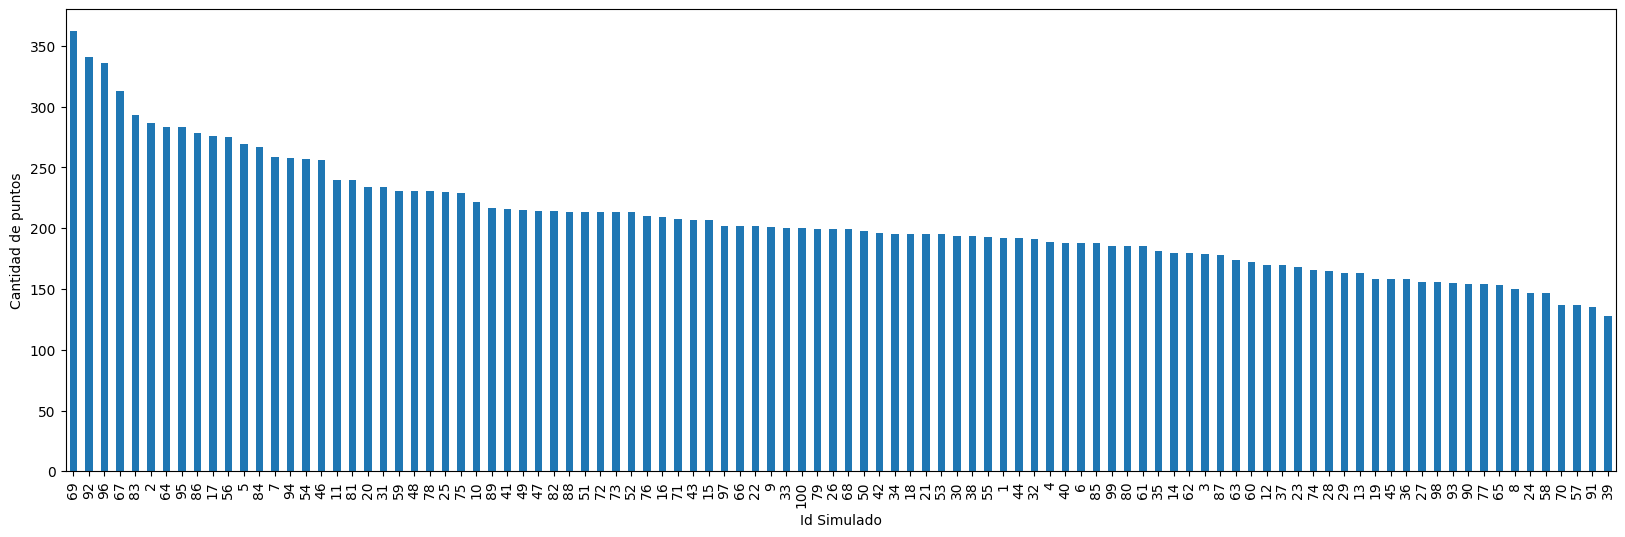

In [ ]:
#Veamos cada campaña
plt.figure(figsize=(20,6))
df.unit_number.value_counts().plot.bar()
plt.xlabel('Id Simulado')
plt.ylabel('Cantidad de puntos')

##análisis gráfico
 del conjunto FD001, se observa que sensores como T50 (temperatura de salida de la turbina) presentan una tendencia creciente a medida que aumentan los ciclos, lo que indica un mayor esfuerzo térmico conforme el motor se degrada. Por otro lado, variables como P30 (presión del compresor de alta presión) tienden a disminuir progresivamente, reflejando una pérdida de rendimiento del sistema. Sensores como Nc y Nf muestran leves fluctuaciones o descensos hacia el final del ciclo de vida. Estas tendencias permiten identificar patrones claros de degradación en un entorno sin variabilidad externa, lo que hace de FD001 un caso ideal para estudiar el deterioro de motores con un solo modo de falla.











**Analisis experimento 2**

In [ ]:
fd_002 = pd.read_csv("/content/drive/MyDrive/CMAPSS/CMAPSS/train_FD002.txt",sep=" ",header=None)

In [ ]:
fd_002

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN


In [ ]:
fd_002.drop(columns=[26,27],inplace=True)

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [ ]:
fd_002.columns = columns

In [ ]:
fd_002

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


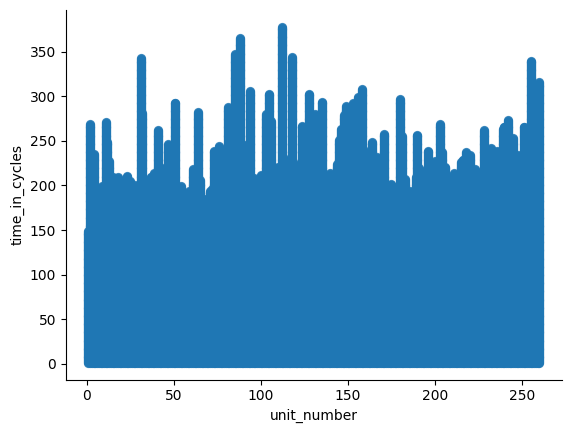

In [ ]:
from matplotlib import pyplot as plt
fd_002.plot(kind='scatter', x='unit_number', y='time_in_cycles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def prepare_train_data(data, factor = 0):
    # Hacer una copia del DataFrame original para evitar cambios en el DataFrame original
    df = data.copy()
    #Agrupar por

##Analisis del grafico
En FD002, los gráficos de sensores muestran un comportamiento más disperso en comparación con FD001 debido a las seis condiciones operativas diferentes. Por ejemplo, T50 aún muestra una tendencia creciente general, pero con más variaciones entre motores por las diferencias de entorno. La P30 también disminuye con el tiempo, pero su curva no es tan suave ni uniforme. Se observan saltos o cambios bruscos en sensores como Nc y TRA, que responden a los cambios de altitud y empuje. Esto complica el análisis directo de degradación, ya que es necesario aislar los efectos del entorno para detectar el desgaste real.



##Analisis experimento 3


In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [ ]:
fd_003

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,NaN,NaN
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,NaN,NaN
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,NaN,NaN
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,NaN,NaN


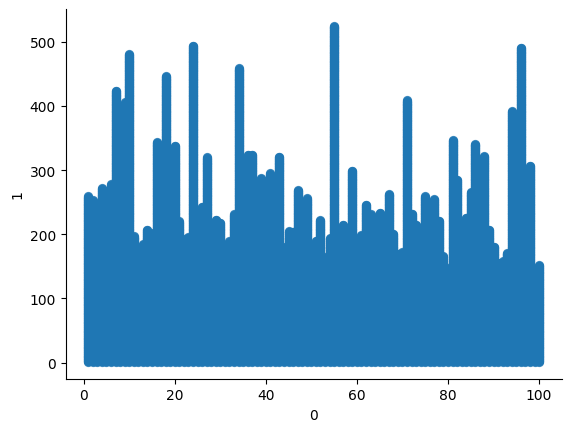

In [ ]:
from matplotlib import pyplot as plt
fd_003.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##Analisis del grafico

El gráfico muestra la variabilidad del RUL inicial de 100 motores en el dataset FD003, con valores entre 0 y más de 500 ciclos. Esta dispersión indica diferencias en la durabilidad de los motores y la necesidad de un buen preprocesamiento para predecir el RUL con precisión.

In [ ]:
def prepare_train_data(data, factor = 0):
    # Hacer una copia del DataFrame original para evitar cambios en el DataFrame original
    df = data.copy()
    #Agrupar por

##Analisis experimento 4

In [ ]:
fd_004

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,NaN,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,NaN,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,NaN,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,NaN,NaN


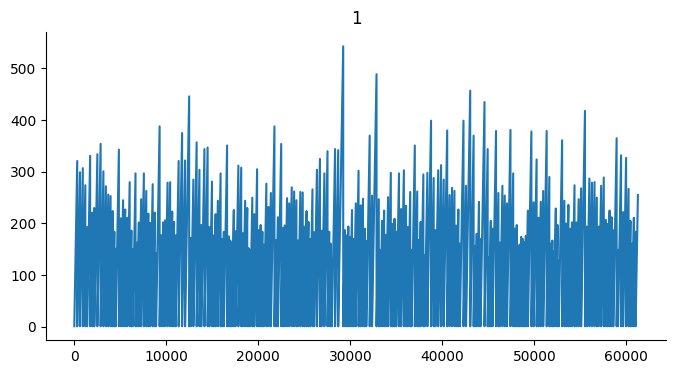

In [ ]:
from matplotlib import pyplot as plt
fd_004[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

##Analisis del grafico

El gráfico muestra la alta variabilidad de un sensor en el dataset FD004, con más de 60.000 registros. Se observan muchos picos y caídas bruscas, lo que indica un comportamiento complejo y ruidoso típico de este conjunto, útil para detectar fallas pero que requiere filtrado para un análisis efectivo.











##Conclusion
FD001
 Degradación consistente en entorno controlado. Tendencias claras en sensores (T50, P30). Ideal para análisis en condiciones estables.

FD002
 Variabilidad por condiciones operativas. Dispersión en gráficos y sensores. Saltos en Nc y TRA por cambios de condición. Escenario realista.

FD003
 Múltiples fallas simultáneas. Densidad al final del gráfico. Modelos de pronóstico complejos.

FD004
Condiciones variables, uso creciente. Influencia de factores externos en sensores. Escenario realista complejo.

Comparación
 FD001: Controlado. FD002/FD004: Realista/variable. FD003: Fallas múltiples. Gráfico según objetivo.

Conclusión
 Visualización de la degradación. Información valiosa para mantenimiento predictivo. Perspectivas únicas por conjunto y gráfico.